# Análise de Dados de Produtos Agrícolas

Neste notebook, vamos realizar uma análise completa de um conjunto de dados sobre produtos agrícolas. O objetivo é entender as condições ideais de solo e clima para diferentes culturas e construir modelos de Machine Learning para prever a cultura mais adequada dadas essas condições.

## 1. Carregamento e Análise Exploratória dos Dados

Vamos começar carregando a base de dados e fazendo uma exploração inicial para nos familiarizarmos com a estrutura e o conteúdo dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Carregar o dataset
df = pd.read_csv('Atividade_Cap10_produtos_agricolas.csv')

# Exibir as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Exibir informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
df.info()

# Exibir estatísticas descritivas
print("\nEstatísticas descritivas do dataset:")
print(df.describe())

# Verificar valores nulos
print("\nVerificação de valores nulos:")
print(df.isnull().sum())

Primeiras 5 linhas do dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64

## 2. Análise Descritiva e Visualização

Agora, vamos criar algumas visualizações para entender melhor a distribuição dos dados e as relações entre as variáveis.

Distribuição das variáveis numéricas:


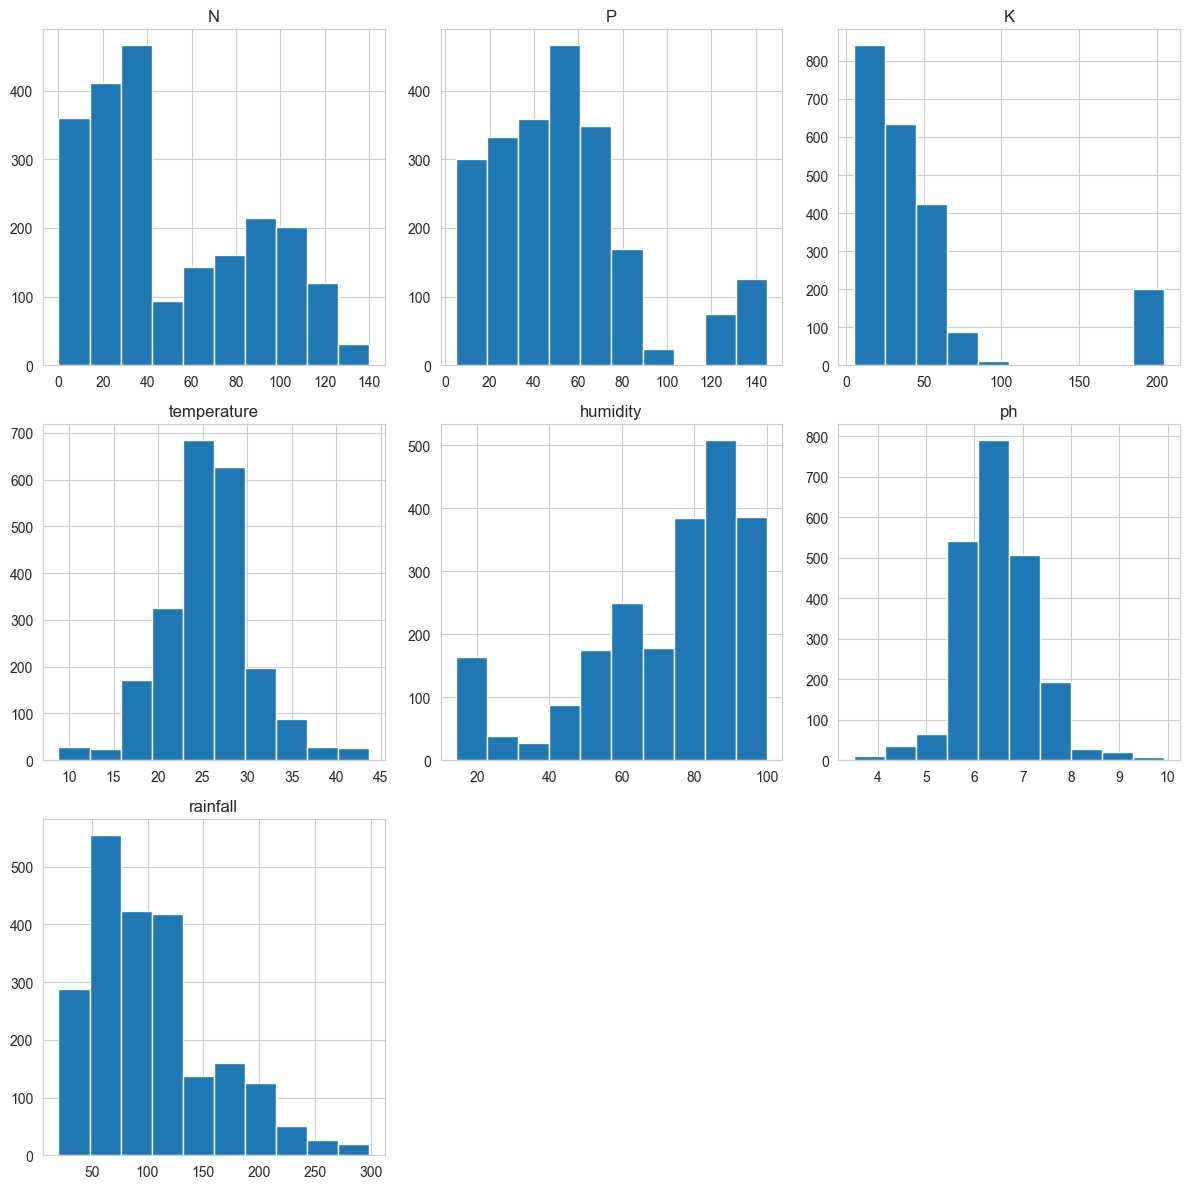

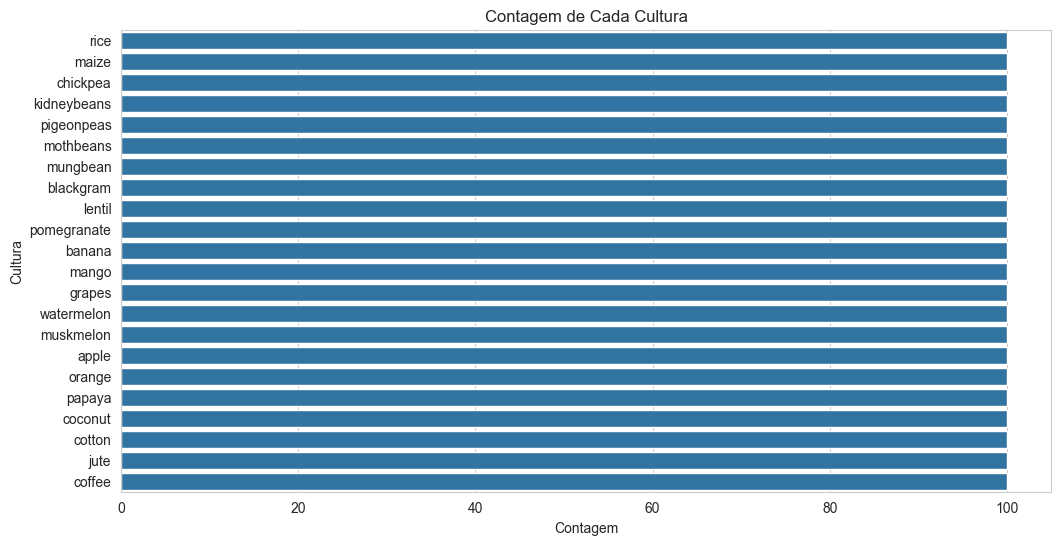


Matriz de Correlação:


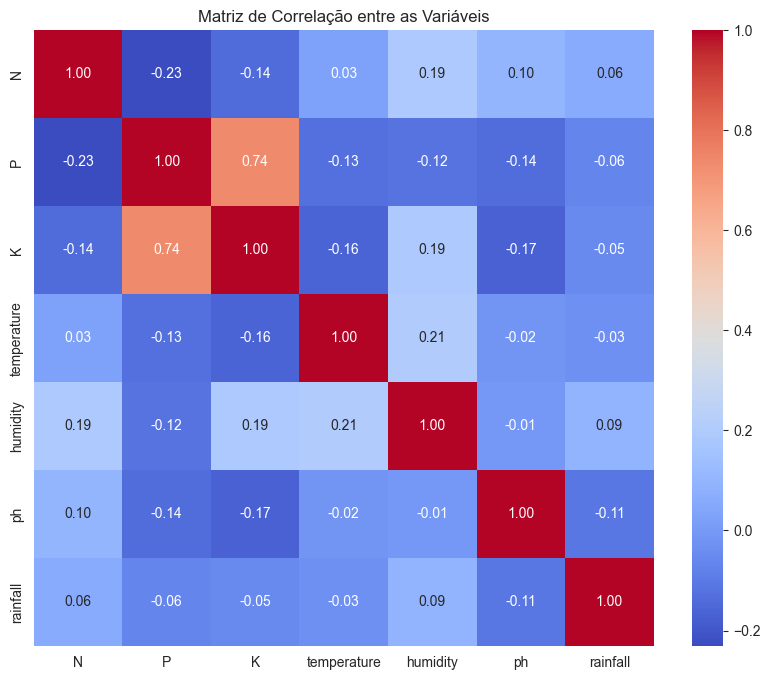


Boxplots das variáveis por cultura:


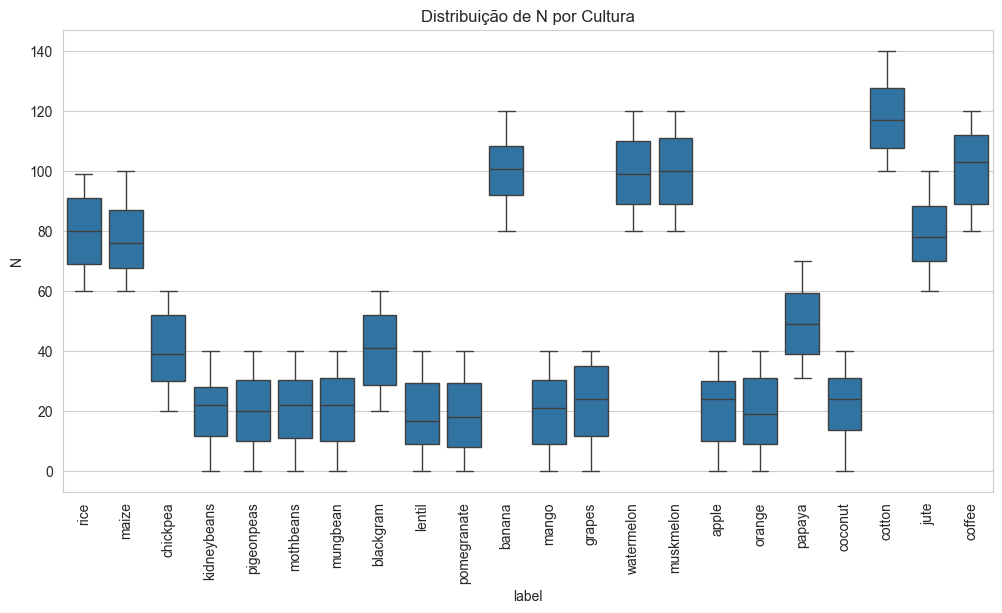

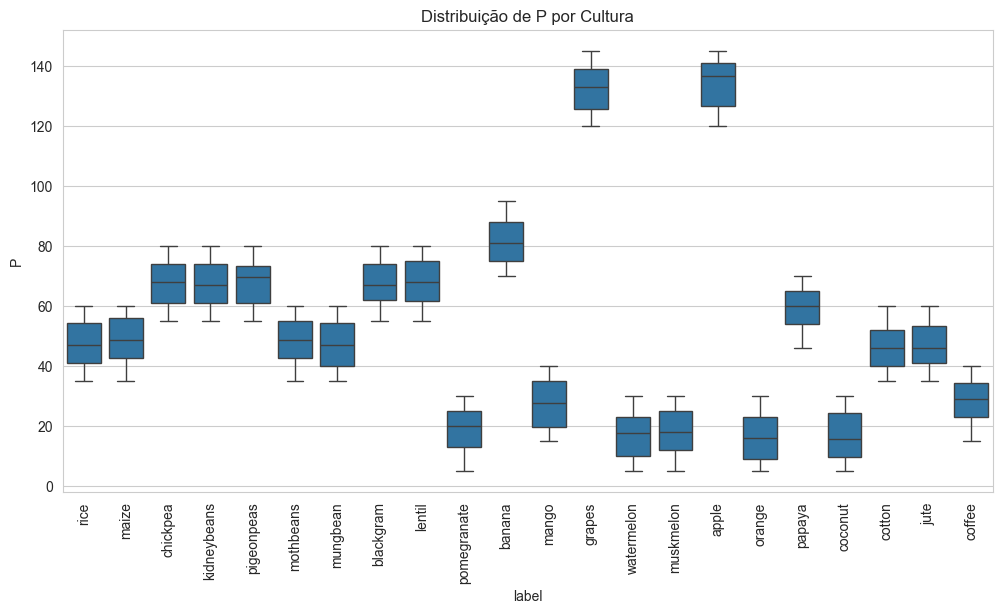

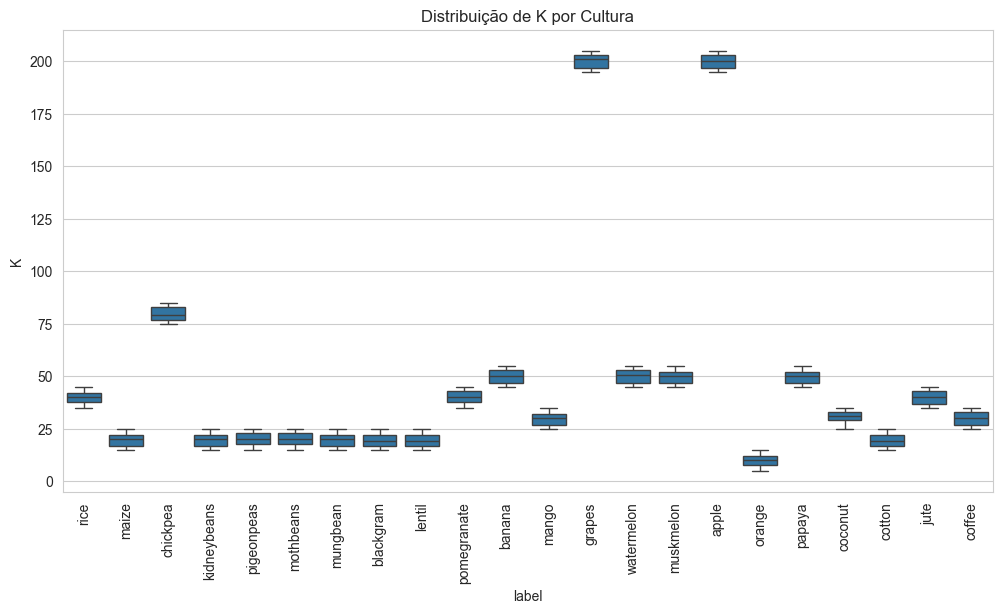

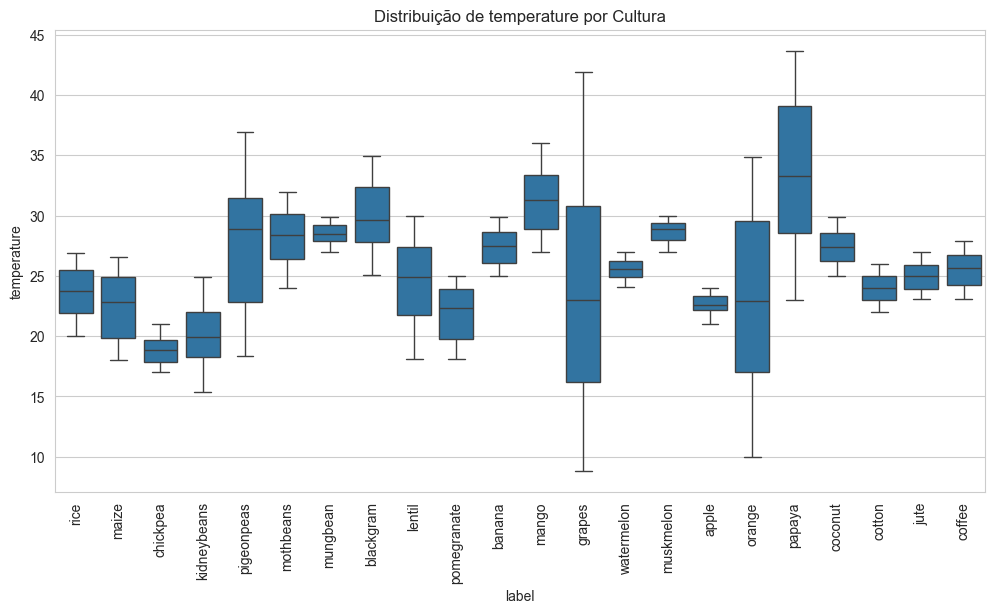

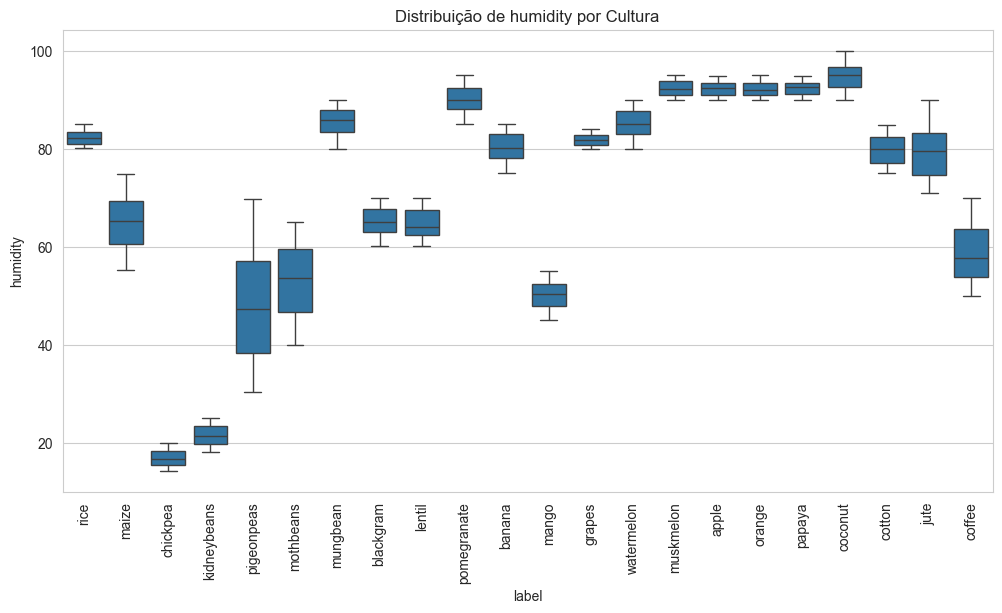

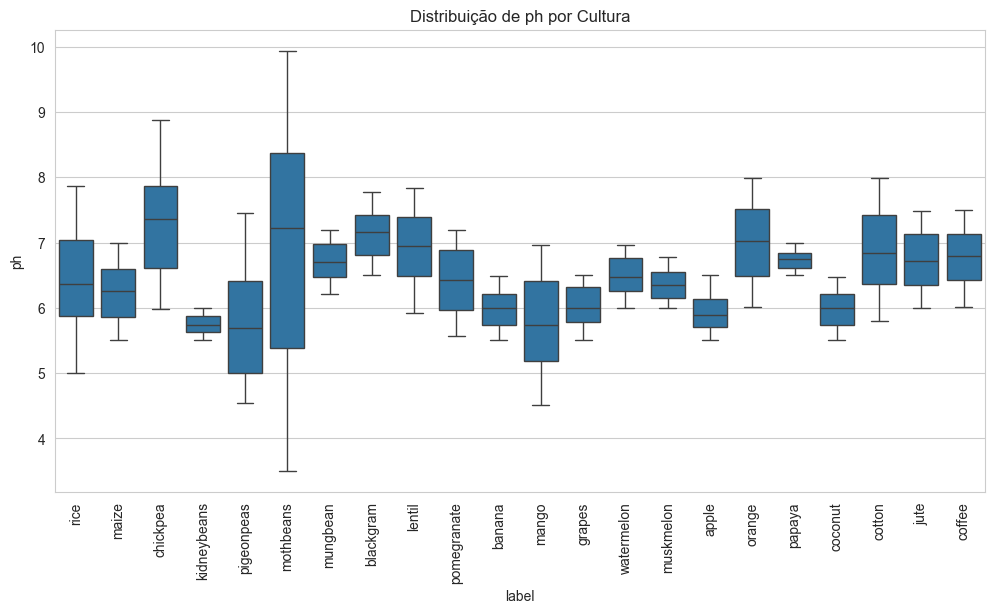

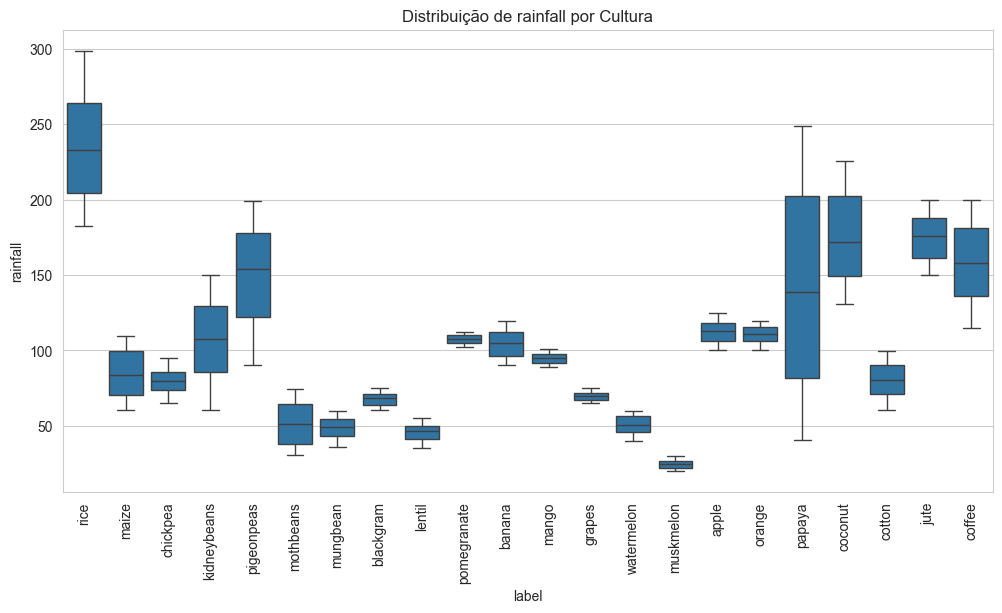


Relação entre Temperatura e Umidade:


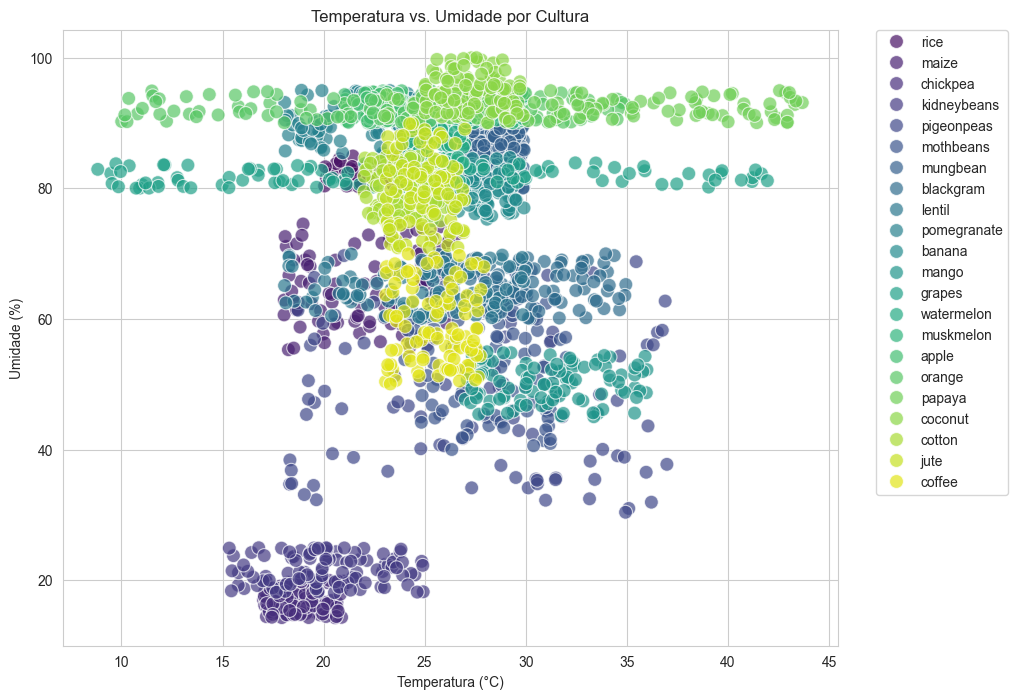

In [3]:
# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Histogramas para cada variável numérica
print("Distribuição das variáveis numéricas:")
df.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

# 2. Gráfico de barras da contagem de cada cultura
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order = df['label'].value_counts().index)
plt.title('Contagem de Cada Cultura')
plt.xlabel('Contagem')
plt.ylabel('Cultura')
plt.show()

# 3. Matriz de correlação com heatmap
print("\nMatriz de Correlação:")
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

# 4. Boxplots das variáveis numéricas agrupadas por cultura
print("\nBoxplots das variáveis por cultura:")
for column in df.columns[:-1]:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='label', y=column, data=df)
        plt.title(f'Distribuição de {column} por Cultura')
        plt.xticks(rotation=90)
        plt.show()

# 5. Gráfico de dispersão entre temperatura e umidade
print("\nRelação entre Temperatura e Umidade:")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Temperatura vs. Umidade por Cultura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 3. Análise do Perfil Ideal de Solo e Clima

Nesta seção, vamos determinar o "perfil ideal" de solo e clima calculando a média de cada característica para todo o conjunto de dados. Em seguida, compararemos esse perfil ideal com as médias de três culturas específicas para entender suas necessidades particulares.

Perfil Ideal de Solo e Clima (Média Geral):
N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

Perfil Médio para as Culturas Escolhidas:
              N      P      K  temperature   humidity        ph    rainfall
label                                                                      
chickpea  40.09  67.79  79.92    18.872847  16.860439  7.336957   80.058977
maize     77.76  48.44  19.79    22.389204  65.092249  6.245190   84.766988
rice      79.89  47.58  39.87    23.689332  82.272822  6.425471  236.181114


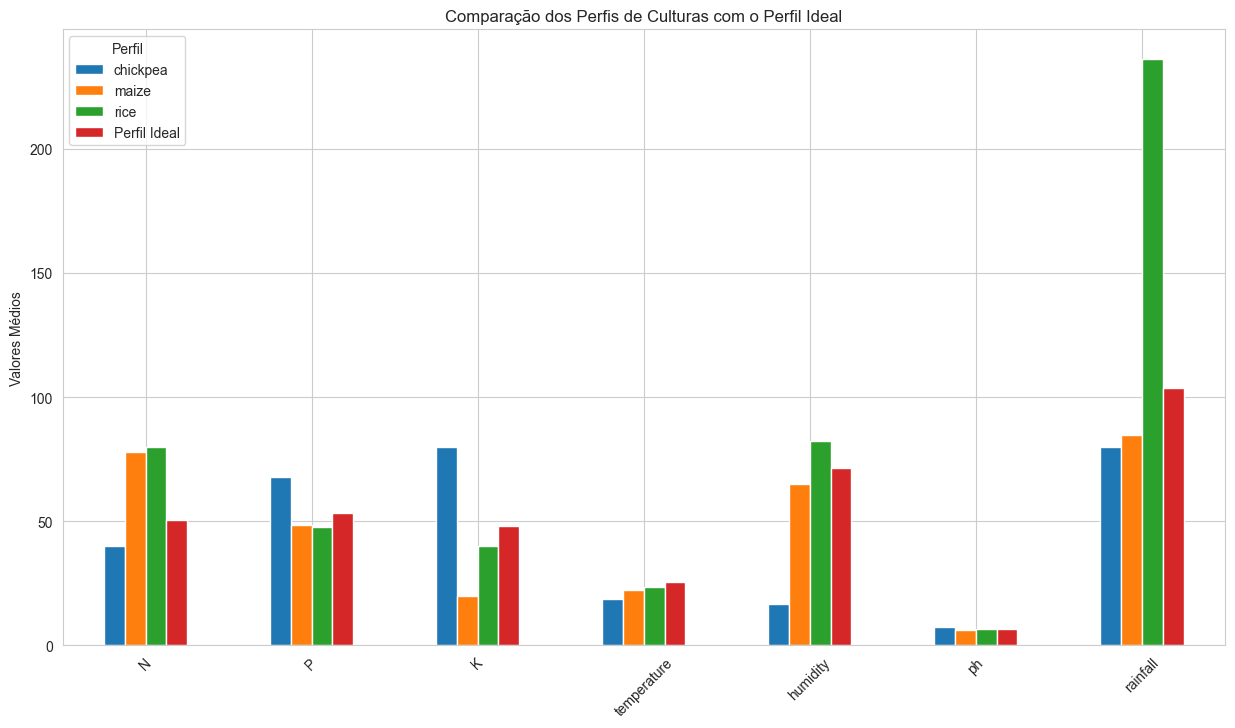

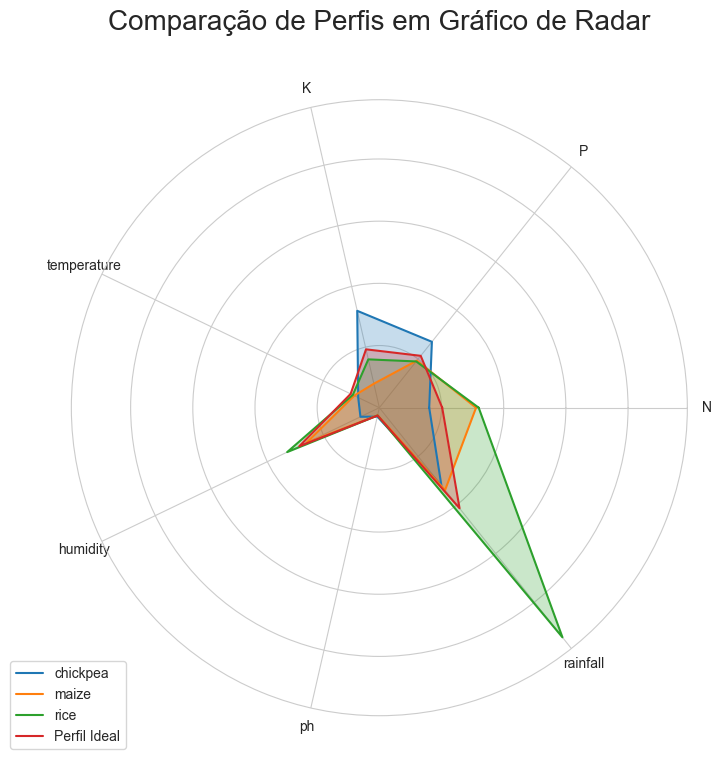

In [5]:
# Calcular o perfil ideal (média geral)
perfil_ideal = df.drop('label', axis=1).mean()
print("Perfil Ideal de Solo e Clima (Média Geral):")
print(perfil_ideal)

# Escolher 3 culturas para análise
culturas_escolhidas = ['rice', 'maize', 'chickpea']
df_culturas = df[df['label'].isin(culturas_escolhidas)]

# Calcular o perfil médio para as culturas escolhidas
perfil_culturas = df_culturas.groupby('label').mean()
print("\nPerfil Médio para as Culturas Escolhidas:")
print(perfil_culturas)

# Comparar os perfis - CORREÇÃO APLICADA AQUI
# O método .append foi substituído por pd.concat.
perfil_ideal_df = perfil_ideal.to_frame('Perfil Ideal').T
comparacao_perfis = pd.concat([perfil_culturas, perfil_ideal_df])
comparacao_perfis_T = comparacao_perfis.T

# Visualização da Comparação
comparacao_perfis_T.plot(kind='bar', figsize=(15, 8))
plt.title('Comparação dos Perfis de Culturas com o Perfil Ideal')
plt.ylabel('Valores Médios')
plt.xticks(rotation=45)
plt.legend(title='Perfil')
plt.show()

# Gráfico de Radar para uma comparação mais intuitiva
labels = comparacao_perfis_T.index
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in comparacao_perfis_T.T.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=i)
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Comparação de Perfis em Gráfico de Radar', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

## 4. Preparação dos Dados para Modelagem

Antes de treinar os modelos, precisamos preparar os dados. Isso envolve separar as features (variáveis independentes) do target (variável dependente), dividir os dados em conjuntos de treino e teste, e escalar as features para que tenham a mesma ordem de magnitude.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar features (X) e target (y)
X = df.drop('label', axis=1)
y = df['label']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

# Escalar as features numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter os arrays escalados de volta para DataFrames para facilitar a visualização (opcional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nPrimeiras 5 linhas dos dados de treino escalados:")
print(X_train_scaled.head())

Tamanho do conjunto de treino: 1760 amostras
Tamanho do conjunto de teste: 440 amostras

Primeiras 5 linhas dos dados de treino escalados:
          N         P         K  temperature  humidity        ph  rainfall
0 -1.371628 -1.072910 -0.673510     0.819481  0.924395  0.937545  0.199440
1 -1.127411  2.084513  3.015261     0.783251  0.426613 -1.153846 -0.643677
2 -1.073140  0.536162 -0.476250    -0.879968 -2.186291 -1.107452  0.694001
3 -0.340487 -0.465713 -0.594606     0.138043 -0.459237 -0.229482 -1.231744
4 -0.883193 -1.255069 -0.791866    -2.563232  0.915842 -0.341959  0.289941


## 5. Modelo 1: Regressão Logística

Nosso primeiro modelo será a Regressão Logística, um algoritmo de classificação linear simples e eficiente.

Acurácia da Regressão Logística: 0.9727

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange

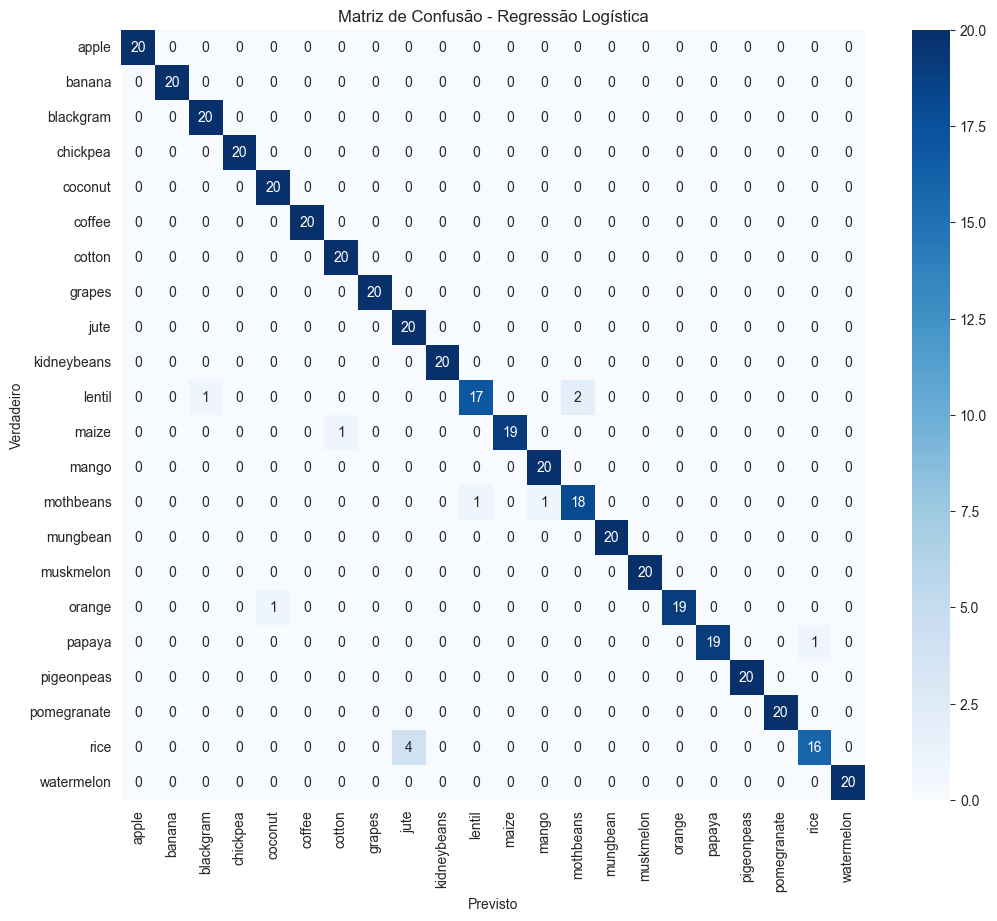

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Treinar o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Avaliar a performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Acurácia da Regressão Logística: {accuracy_log_reg:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))

print("\nMatriz de Confusão:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

## 6. Modelo 2: K-Nearest Neighbors (KNN)

O segundo modelo é o K-Nearest Neighbors (KNN), um algoritmo baseado em instância que classifica uma amostra com base na classe de seus "vizinhos" mais próximos.

Acurácia do KNN (k=5): 0.9795

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.91      1.00      0.95        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.94      0.85      0.89        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.0

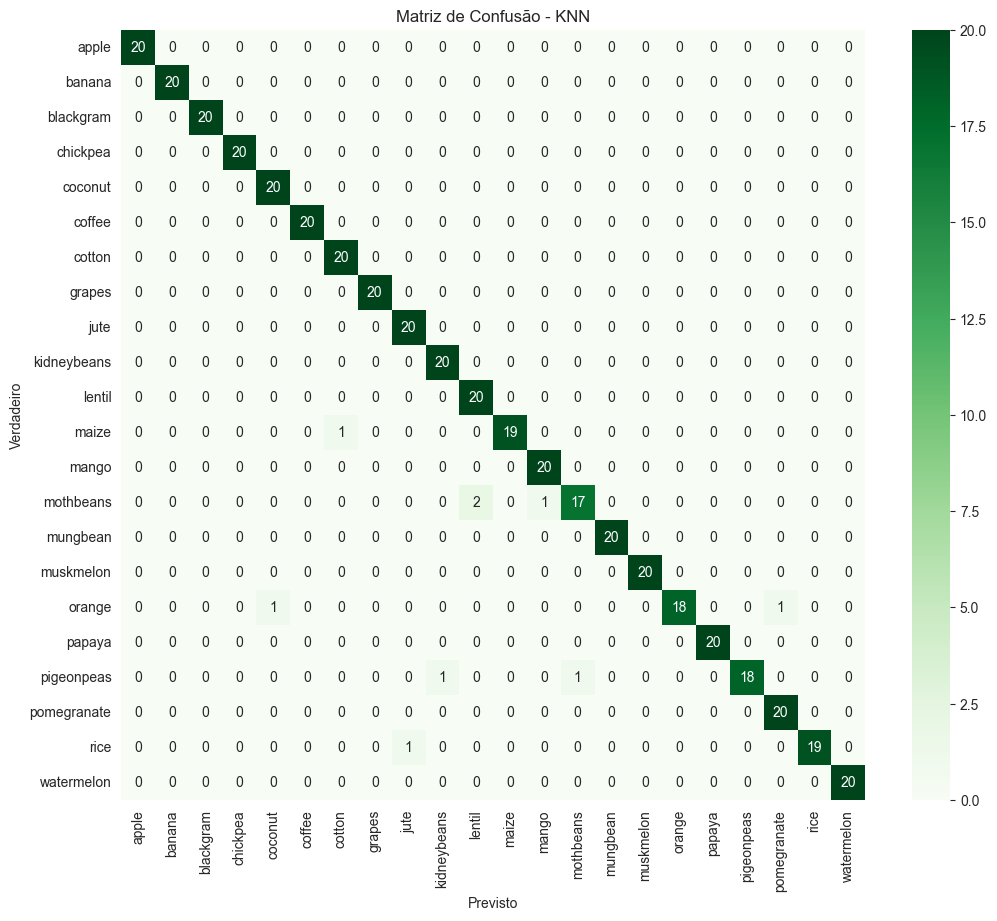

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Treinar o modelo KNN
# Vamos começar com um valor comum para k, como 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_knn = knn.predict(X_test_scaled)

# Avaliar a performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do KNN (k=5): {accuracy_knn:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))

print("\nMatriz de Confusão:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

## 7. Modelo 3: Support Vector Machine (SVM)

O terceiro modelo é o Support Vector Machine (SVM), um classificador poderoso que encontra o hiperplano que melhor separa as classes no espaço de features.

Acurácia do SVM (kernel RBF): 0.9841

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.90      0.95        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange   

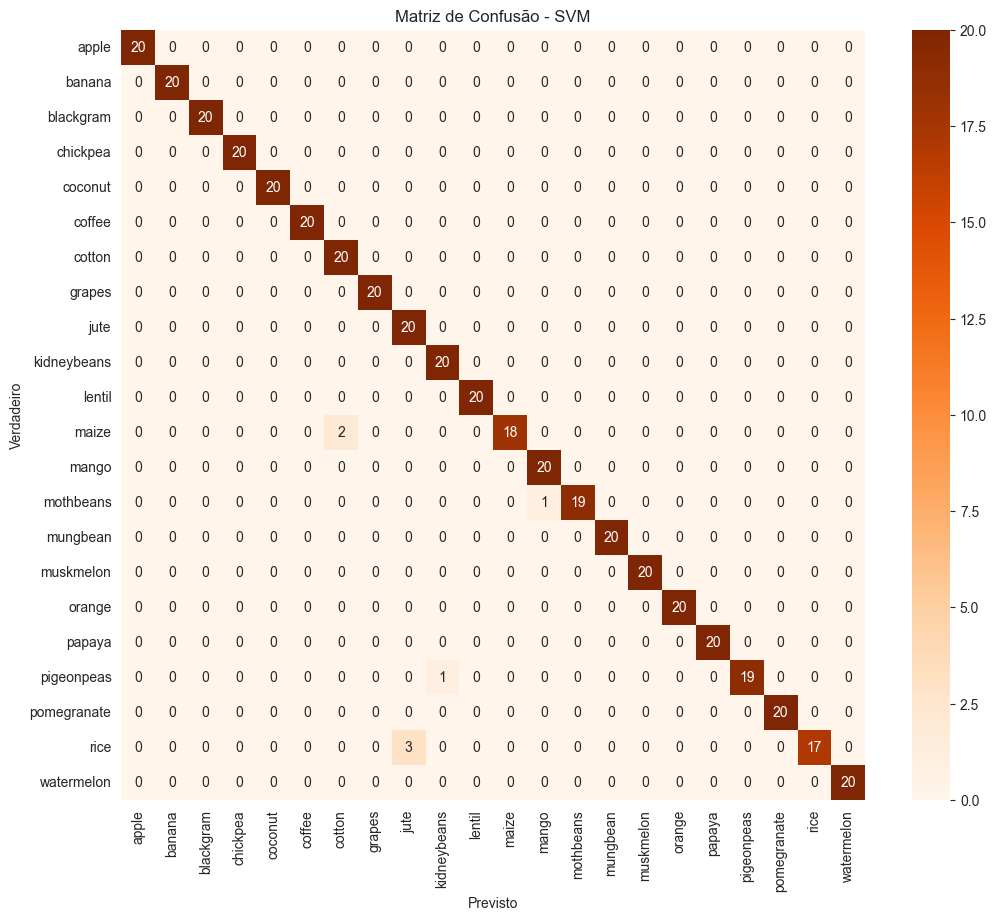

In [9]:
from sklearn.svm import SVC

# Treinar o modelo SVM
# Usaremos o kernel RBF, que é um bom ponto de partida
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_svm = svm.predict(X_test_scaled)

# Avaliar a performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do SVM (kernel RBF): {accuracy_svm:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_svm))

print("\nMatriz de Confusão:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title('Matriz de Confusão - SVM')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

## 8. Modelo 4: Random Forest

O quarto modelo é o Random Forest, um método de ensemble que constrói várias árvores de decisão e combina suas previsões para obter um resultado mais robusto e preciso.

Acurácia do Random Forest: 0.9955

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange      

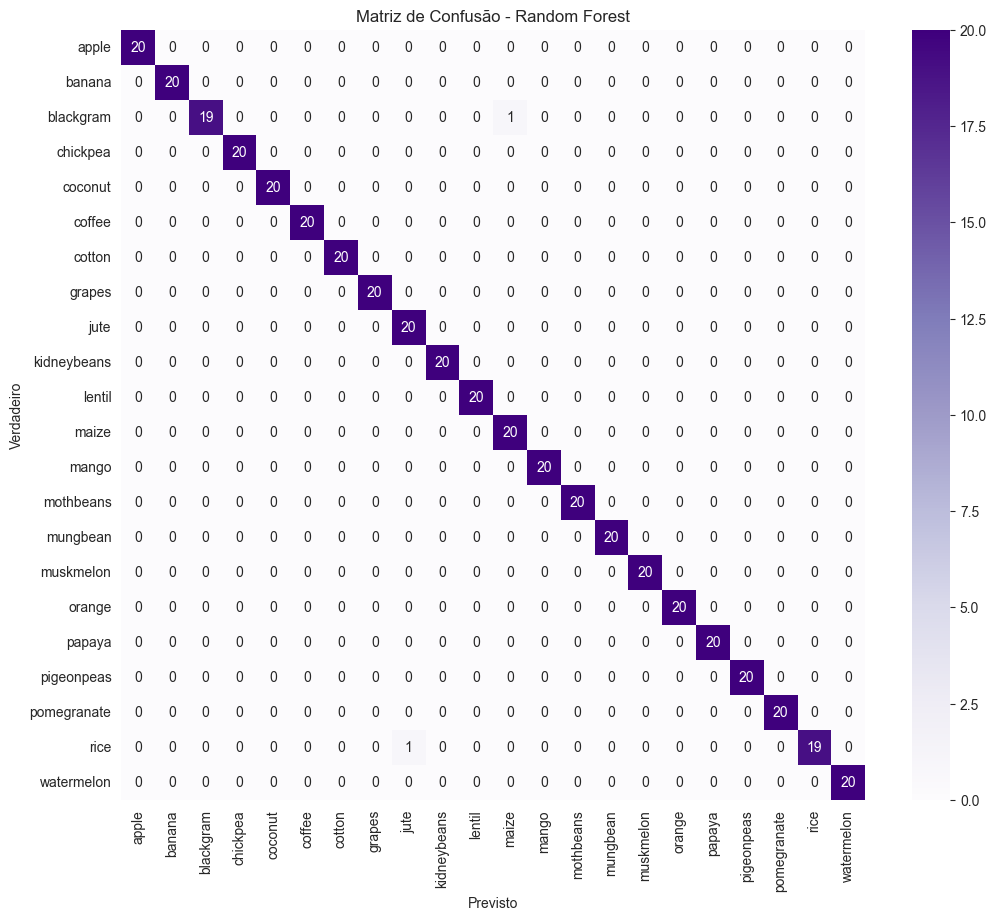

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test_scaled)

# Avaliar a performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {accuracy_rf:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

print("\nMatriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

## 9. Modelo 5: Gradient Boosting

Nosso quinto e último modelo é o Gradient Boosting, outro método de ensemble poderoso que constrói modelos de forma sequencial, onde cada novo modelo corrige os erros do anterior. Usaremos a implementação `XGBoost`, que é conhecida por sua alta performance.

Acurácia do XGBoost: 0.9932

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.90      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       0.95      1.00      0.98        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00 

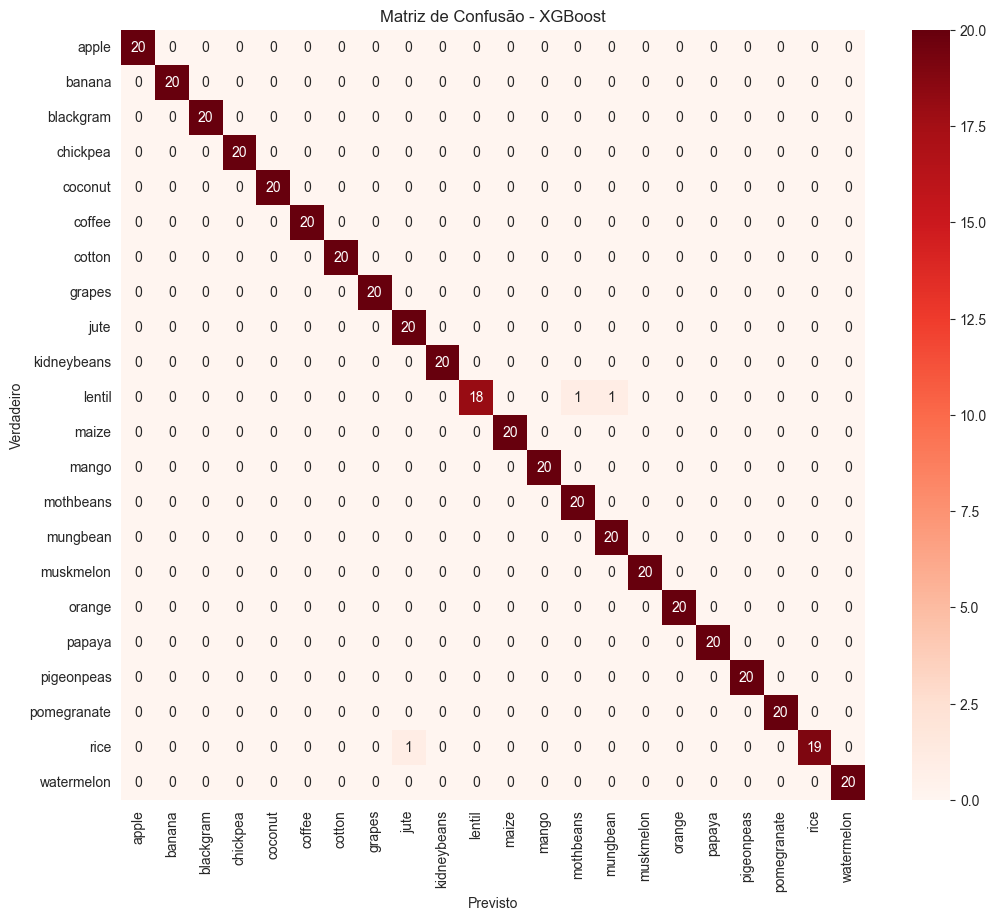

In [11]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# O XGBoost requer que os rótulos (labels) sejam numéricos.
# Vamos usar o LabelEncoder para transformá-los.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Treinar o modelo XGBoost
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), seed=42)
xgb_clf.fit(X_train_scaled, y_train_encoded)

# Fazer previsões
y_pred_xgb_encoded = xgb_clf.predict(X_test_scaled)

# Decodificar as previsões de volta para os rótulos originais
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

# Avaliar a performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do XGBoost: {accuracy_xgb:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_xgb))

print("\nMatriz de Confusão:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

## 10. Comparação e Avaliação dos Modelos

Finalmente, vamos compilar as métricas de acurácia de todos os modelos em uma tabela e um gráfico para comparar suas performances e determinar qual se saiu melhor na tarefa de prever a cultura agrícola.

Tabela de Performance dos Modelos:
                Modelo  Acurácia
3        Random Forest  0.995455
4              XGBoost  0.993182
2            SVM (RBF)  0.984091
1            KNN (k=5)  0.979545
0  Regressão Logística  0.972727


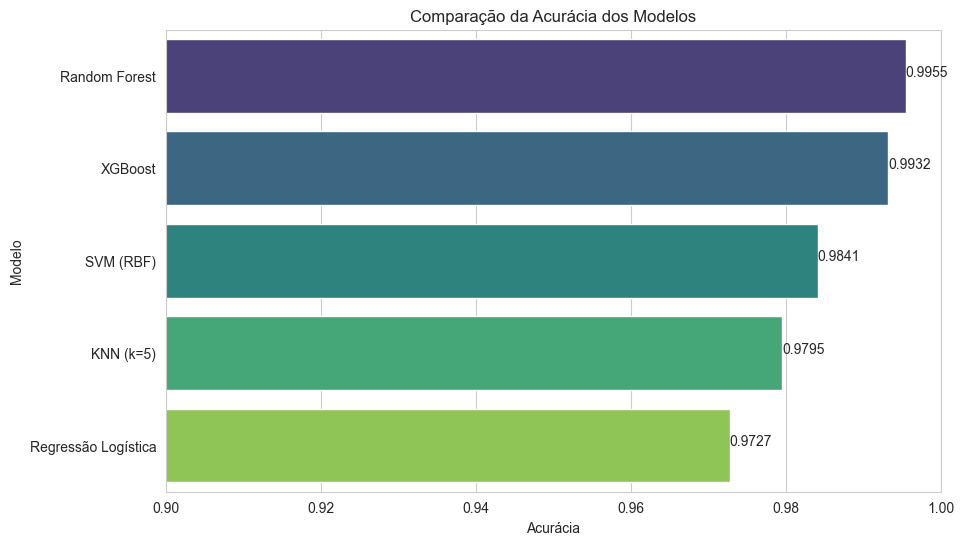

In [13]:
# Coletar as métricas de acurácia
model_performance = {
    'Modelo': ['Regressão Logística', 'KNN (k=5)', 'SVM (RBF)', 'Random Forest', 'XGBoost'],
    'Acurácia': [accuracy_log_reg, accuracy_knn, accuracy_svm, accuracy_rf, accuracy_xgb]
}

performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Acurácia', ascending=False)

print("Tabela de Performance dos Modelos:")
print(performance_df)

# Visualizar a comparação da acurácia
plt.figure(figsize=(10, 6))
sns.barplot(x='Acurácia', y='Modelo', data=performance_df, palette='viridis', hue='Modelo', legend=False)
plt.title('Comparação da Acurácia dos Modelos')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.9, 1.0) # Ajustar o limite do eixo x para melhor visualização
for index, value in enumerate(performance_df['Acurácia']):
    plt.text(value, index, f'{value:.4f}')
plt.show()